In [1]:
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df_covid_stats = pd.read_excel('covid_stats.xlsx')

In [3]:
df_covid_stats.head(5)

,Date,Total Cases,Total Death
0,2020-03-10,6,NaN
1,2020-03-11,10,NaN
2,2020-03-12,13,1.0
3,2020-03-13,8,1.0
4,2020-03-14,16,2.0


In [4]:
df_covid_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         60 non-null     datetime64[ns]
 1   Total Cases  60 non-null     int64         
 2   Total Death  58 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 KB


In [9]:
df = pd.read_pickle('india_dataset_Mar_Apr.pkl')

In [10]:
df.published_at[:5]

0    2020-04-06
1    2020-04-06
2    2020-04-06
3    2020-04-06
4    2020-04-06
Name: published_at, dtype: object

In [11]:
df_news_vol = df[['published_at', 'title']].groupby(by='published_at').count().reset_index()
df_news_vol.columns = ['published_at', 'News Volume']

In [12]:
df_news_vol.head(5)

,published_at,News Volume
0,2020-03-10,141
1,2020-03-11,197
2,2020-03-12,228
3,2020-03-13,252
4,2020-03-14,240


In [13]:
df_news_vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   published_at  32 non-null     object
 1   News Volume   32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [14]:
df_news_vol['published_at'] = pd.to_datetime(df_news_vol['published_at'])
df_news_vol.head()

,published_at,News Volume
0,2020-03-10,141
1,2020-03-11,197
2,2020-03-12,228
3,2020-03-13,252
4,2020-03-14,240


In [15]:
df_merged = pd.merge(df_news_vol, df_covid_stats, left_on='published_at', right_on='Date')
df_merged.head()

,published_at,News Volume,Date,Total Cases,Total Death
0,2020-03-10,141,2020-03-10,6,NaN
1,2020-03-11,197,2020-03-11,10,NaN
2,2020-03-12,228,2020-03-12,13,1.0
3,2020-03-13,252,2020-03-13,8,1.0
4,2020-03-14,240,2020-03-14,16,2.0


In [16]:
df_merged.drop(columns='published_at', inplace=True)

In [17]:
df_merged.set_index('Date', inplace=True)

In [18]:
df_merged.head()

,News Volume,Total Cases,Total Death
Date,,,
2020-03-10,141,6,NaN
2020-03-11,197,10,NaN
2020-03-12,228,13,1.0
2020-03-13,252,8,1.0
2020-03-14,240,16,2.0


In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-10 to 2020-04-10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   News Volume  32 non-null     int64  
 1   Total Cases  32 non-null     int64  
 2   Total Death  30 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


### Time Series Plot

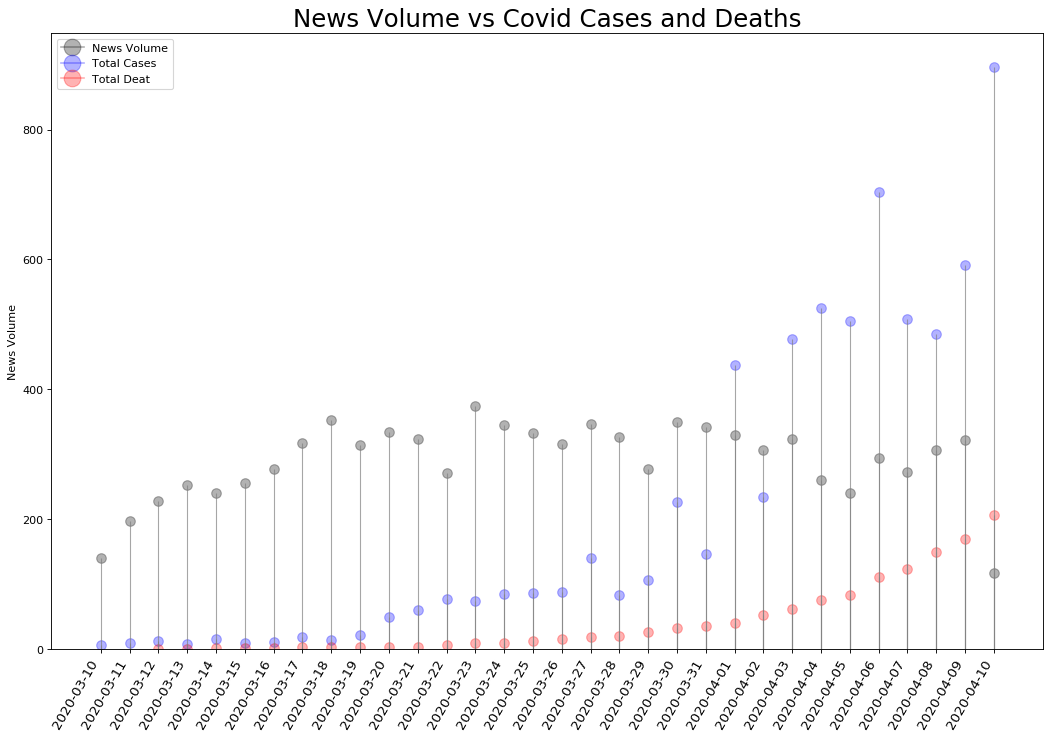

In [21]:
columns = ['News Volume', 'Total Cases', 'Total Death']
colors = ['black', 'blue', 'red']

plt.style.use('default') 

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)

for i, column in enumerate(columns):
    ax.vlines(x=df_merged.index, ymin=0, ymax=df_merged[column], color='grey', alpha=0.7, linewidth=1)
    ax.scatter(x=df_merged.index, y=df_merged[column], s=75, color=colors[i], alpha=0.3)

# Title, Label, Ticks and Ylim
ax.set_title('News Volume vs Covid Cases and Deaths', fontdict={'size':22})
ax.set_ylabel('News Volume')
ax.set_xticks(df_merged.index)
ax.set_xticklabels(df_merged.index.date, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(bottom=0)


# Setting legend
legend_elements = [Line2D([0], [0], marker='o', color='black', label='News Volume', alpha=0.3, markersize=15),
                   Line2D([0], [0], marker='o', color='blue', label='Total Cases', alpha=0.3, markersize=15),
                   Line2D([0], [0], marker='o', color='red', label='Total Deat', alpha=0.3, markersize=15)]
ax.legend(handles=legend_elements, loc='upper left')

# # Annotate
# for row in df_merged.itertuples():
#     ax.text(row.Index, row.title+.5, s=round(row.title, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)

plt.show()